In [ ]:
# Bargav Jagatha
# jbargav025@gmail.com

In [341]:
import sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import catboost as ca

In [342]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [343]:
temp_df = df.loc[(df['capital-gain'] == 0)]
temp_df = temp_df.loc[(df['capital-loss'] == 0)]
temp_df['education'].value_counts()

 HS-grad         9415
 Some-college    6533
 Bachelors       4384
 Masters         1300
 Assoc-voc       1194
 11th            1089
 Assoc-acdm       930
 10th             865
 7th-8th          582
 9th              474
 12th             403
 Prof-school      363
 5th-6th          308
 Doctorate        284
 1st-4th          159
 Preschool         47
Name: education, dtype: int64

In [346]:
temp_df.loc[(temp_df['salary'] == ' <=50K')]['education'].value_counts()

 HS-grad         8183
 Some-college    5519
 Bachelors       2886
 11th            1055
 Assoc-voc        937
 10th             821
 Assoc-acdm       743
 Masters          681
 7th-8th          552
 9th              452
 12th             380
 5th-6th          297
 1st-4th          154
 Prof-school      135
 Doctorate         97
 Preschool         47
Name: education, dtype: int64

In [348]:
temp_df.loc[(temp_df['salary'] == ' >50K')]['education'].value_counts()

 Bachelors       1498
 HS-grad         1232
 Some-college    1014
 Masters          619
 Assoc-voc        257
 Prof-school      228
 Doctorate        187
 Assoc-acdm       187
 10th              44
 11th              34
 7th-8th           30
 12th              23
 9th               22
 5th-6th           11
 1st-4th            5
Name: education, dtype: int64

In [241]:
len(df)

32561

In [242]:
# Distribution

In [243]:
df['country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [244]:
df.drop(df[df['country'] == ' Holand-Netherlands'].index, inplace = True)  # only one Holand-Netherlands

# cleaning data here

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

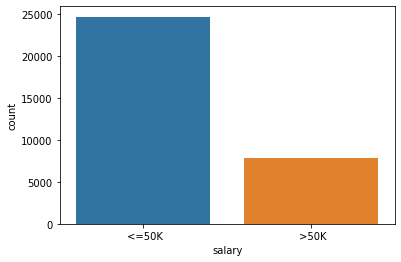

In [245]:
sns.countplot(df['salary'])

In [246]:
df['salary'].value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [247]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [248]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [249]:
(df['workclass'] == ' ?').sum()   # unwanted ' ?' values

1836

In [250]:
df.loc[df['workclass'] == ' ?']['salary'].value_counts()

 <=50K    1645
 >50K      191
Name: salary, dtype: int64

In [251]:
temp_df = df.loc[df['workclass'] == ' ?']    # ' ?' values in 'workclass and 'occupation
len(temp_df.loc[df['occupation'] == ' ?'])

1836

In [252]:
temp_df['salary'].value_counts()

 <=50K    1645
 >50K      191
Name: salary, dtype: int64

In [253]:
# deleting ' ?' rows doesnt change labels' distribution

In [254]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [255]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [256]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [257]:
(df['occupation'] == ' ?').sum()

1843

In [258]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [259]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [260]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

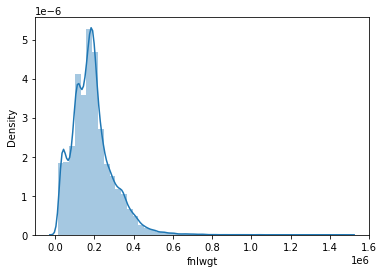

In [261]:
# (df['occupation'] == ' ?' df['workclass'] == ' ?').sum()

sns.distplot(df['fnlwgt'])

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education-num', ylabel='Density'>

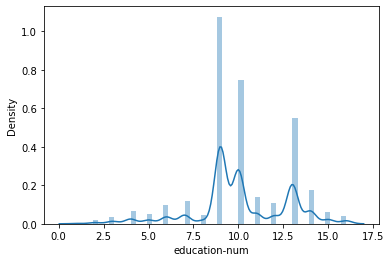

In [262]:
sns.distplot(df['education-num'])

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

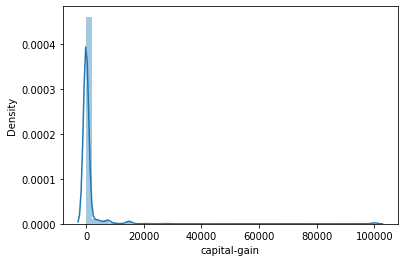

In [263]:
sns.distplot(df['capital-gain'])

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

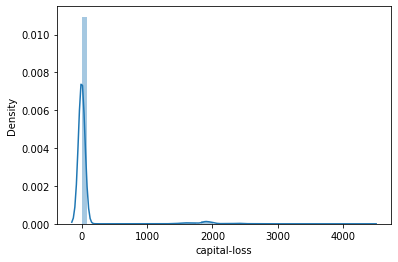

In [264]:
sns.distplot(df['capital-loss'])

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

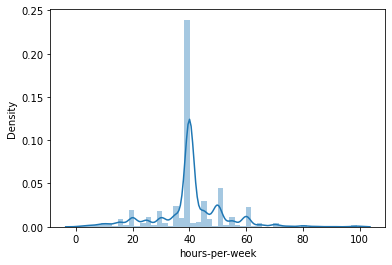

In [265]:
sns.distplot(df['hours-per-week'])

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

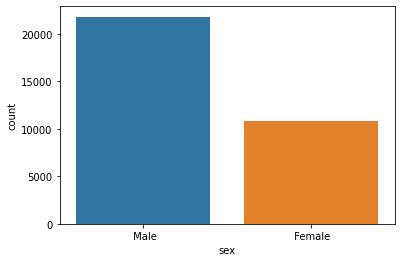

In [266]:
sns.countplot(df['sex'])

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

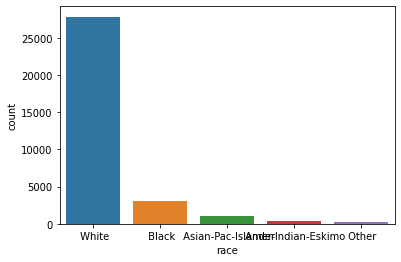

In [267]:
sns.countplot(df['race'])

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

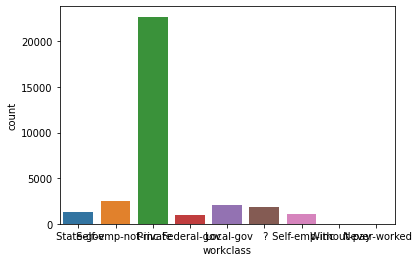

In [268]:
sns.countplot(df['workclass'])

In [269]:
# sns.catplot(x = df['workclass'], y = df['salary'])

In [270]:
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']

In [271]:
num_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [272]:
df.drop(df[df['occupation'] == ' ?'].index, inplace = True)

In [273]:
len(df)

30717

/opt/anaconda3/envs/ml_with_torch/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

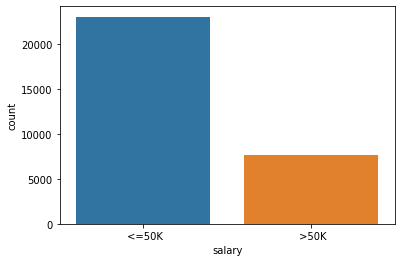

In [274]:
sns.countplot(df['salary'])

In [275]:
from sklearn.pipeline import Pipeline

In [276]:
from sklearn.compose import ColumnTransformer

In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [278]:
# num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [279]:
# df_labels.columns

In [280]:
df_labels = pd.get_dummies(df['salary'])[' <=50K']
y = np.array(df_labels)
y

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [281]:
df.drop(['salary'], axis = 1, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [282]:
y.shape

(30717,)

In [283]:
df.shape

(30717, 14)

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)
X_train.shape

(24573, 14)

In [286]:
X_test.shape

(6144, 14)

In [287]:
np.unique(y_train, return_counts = True)

(array([0, 1], dtype=uint8), array([ 6149, 18424]))

In [288]:
np.unique(y_test, return_counts = True)

(array([0, 1], dtype=uint8), array([1501, 4643]))

In [289]:
pipeline = ColumnTransformer([('num', StandardScaler(), num_features),
                             ('cat', OneHotEncoder(handle_unknown = 'ignore'), cat_features)])

In [290]:
X_train = pipeline.fit_transform(X_train)

In [291]:
X_train

<24573x104 sparse matrix of type '<class 'numpy.float64'>'
	with 344022 stored elements in Compressed Sparse Row format>

In [292]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [293]:
y_train.shape

(24573,)

In [294]:
from xgboost import XGBClassifier

In [295]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [296]:
X_test = pipeline.transform(X_test)

In [297]:
y_pred = model.predict(X_test)

In [298]:
y_pred.shape

(6144,)

In [299]:
# Evaluation

In [300]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.87109375

In [301]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [332]:
from sklearn.metrics import classification_report

In [302]:
precision_score(y_test, y_pred)

0.8969284683570398

In [303]:
recall_score(y_test, y_pred)

0.9371096273960802

In [304]:
f1_score(y_test, y_pred)

0.9165788919317464

In [305]:
param_test1 = {
 'max_depth':range(3,5,2),
 'min_child_weight':range(1,4,2)
}

In [306]:
from sklearn.model_selection import GridSearchCV

In [307]:
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test1, scoring='roc_auc', cv=5)

In [308]:
gsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'max_depth': range(3, 5, 2),
                         'min_child_weight': range(1, 4, 2)},
             scoring='roc_auc')

In [309]:
gsearch_xgb.best_params_, gsearch_xgb.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.92519224858553)

In [310]:
y_pred = gsearch_xgb.predict(X_test)

In [311]:
accuracy_score(y_test, y_pred)

0.8712565104166666

In [324]:
f1_score(y_test, y_pred)

0.9172161172161172

In [335]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1501
           1       0.89      0.94      0.92      4643

    accuracy                           0.87      6144
   macro avg       0.84      0.80      0.81      6144
weighted avg       0.87      0.87      0.87      6144



In [313]:
# no much improvement on using Grid Search CV for hyperparamter tuning

In [314]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [315]:
y_pred_rf = rf_clf.predict(X_test)

In [316]:
accuracy_score(y_test, y_pred_rf)

0.8531901041666666

In [317]:
precision_score(y_test, y_pred_rf)

0.8855905998763142

In [318]:
recall_score(y_test, y_pred_rf)

0.9252638380357527

In [319]:
f1_score(y_test, y_pred_rf)

0.9049926269222666

In [325]:
forest_params = [{'max_depth': [5,7,11], 'max_features': [2,5,10]}]

gridsearch_rf = GridSearchCV(rf_clf, forest_params, cv = 10, scoring='accuracy')

gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 7, 11], 'max_features': [2, 5, 10]}],
             scoring='accuracy')

In [327]:
gridsearch_rf.best_params_, gridsearch_rf.best_score_

({'max_depth': 11, 'max_features': 10}, 0.854027151464092)

In [328]:
y_pred_rf = gridsearch_rf.predict(X_test)

In [329]:
accuracy_score(y_test, y_pred_rf)

0.8572591145833334

In [330]:
forest_params = [{'max_depth': [7,11,15], 'max_features': [7,10,15]}]

gridsearch_rf = GridSearchCV(rf_clf, forest_params, cv = 10, scoring='accuracy')

gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [7, 11, 15],
                          'max_features': [7, 10, 15]}],
             scoring='accuracy')

In [331]:
y_pred_rf = gridsearch_rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8640950520833334

In [333]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68      1501
           1       0.88      0.95      0.91      4643

    accuracy                           0.86      6144
   macro avg       0.84      0.78      0.80      6144
weighted avg       0.86      0.86      0.86      6144



In [ ]:
# ---> XGB is better than RandomForest Classifier

In [336]:
print(classification_report(y_test, y_pred))  # XGB

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1501
           1       0.89      0.94      0.92      4643

    accuracy                           0.87      6144
   macro avg       0.84      0.80      0.81      6144
weighted avg       0.87      0.87      0.87      6144

